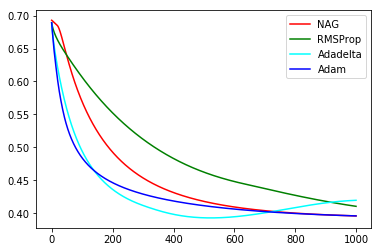

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_svmlight_file
from numpy import *

def GradientDescent(X_data, y_data, learn_rate, iter_times, X_test, y_test, batch_num):
    w = np.zeros((X_data.shape[1] + 1,1))
    X_data = np.c_[X_data, ones(X_data.shape[0])]
    y_data = array([list(y_data)])
    X_data = matrix(X_data)
    y_data = matrix(y_data)
    y_data = y_data.T

    X_test = np.c_[X_test, ones(X_test.shape[0])]
    y_test = array([list(y_test)])
    X_test = matrix(X_test)
    y_test = matrix(y_test)
    y_test = y_test.T
    w = matrix(w)
    w_NAG, L_NAG = NAG(X_data, y_data, w, learn_rate, iter_times, X_test, y_test, batch_num)
    w_RMSProp, L_RMSProp = RMSProp(X_data, y_data, w, learn_rate, iter_times, X_test, y_test, batch_num)
    w_Adadelta, L_Adadelta = Adadelta(X_data, y_data, w, learn_rate, iter_times, X_test, y_test, batch_num)
    w_Adam, L_Adam = Adam(X_data, y_data, w, learn_rate, iter_times, X_test, y_test, batch_num)
    return L_NAG, L_RMSProp,L_Adadelta, L_Adam
def randChoice(X_data, y_data, num):
    data = list(range(num))
    newdata = []
    for i in range(num):
        choice = random.choice(data)
        newdata.append(choice)
        data.remove(choice)
    X_data = matrix(X_data[newdata,:])
    y_data = matrix(y_data[newdata,:])
    return X_data, y_data

def sigmoid(x):
    return 1 / (1 + exp(-x))
def NAG(X_data, y_data, w, learn_rate, iter_times, X_test, y_test, batch_num):
    mome = 0.5
    momeIncrease = 20
    v = matrix(zeros(w.shape))
    Loss = []
    for i in range(iter_times):
        if i == momeIncrease:
            mome = 0.9
        X_randdata, y_randdata = randChoice(X_data,y_data,batch_num)
        f = X_randdata * (w - mome * v)
        grad = (X_randdata.T * (sigmoid(X_randdata * (w - mome * v)) - y_randdata)) / X_randdata.shape[0]
        v = mome * v + learn_rate * grad
        w = w - v
        h = sigmoid(X_test * w)
        f2 = ((sigmoid(X_test * w) >= 0.5) == y_test).sum()
        L = ((multiply(y_test, log(h)) + multiply(1 - y_test, log(1 - h))) / (-X_test.shape[0])).sum()
        Loss.append(L)
    return w, Loss
def RMSProp(X_data, y_data, w, learn_rate, iter_times, X_test, y_test, batch_num):
    gamma = 0.9
    E = matrix(zeros(w.shape))
    epsilon = 1e-05
    Loss = []
    for i in range(iter_times):
        X_randdata, y_randdata = randChoice(X_data,y_data,batch_num)
        grad = (X_randdata.T * (sigmoid(X_randdata * w) - y_randdata)) / X_randdata.shape[0]
        E = gamma * E + (1 - gamma) * multiply(grad, grad)
        w = w - multiply(learn_rate / sqrt(E + epsilon), grad) 
        h = sigmoid(X_test * w)
        f2 = ((sigmoid(X_test * w) >= 0.5) == y_test).sum()
        L = ((multiply(y_test, log(h)) + multiply(1 - y_test, log(1 - h))) / (-X_test.shape[0])).sum()
        Loss.append(L)
    return w, Loss
def Adadelta(X_data, y_data, w, learn_rate, iter_times, X_test, y_test, batch_num):
    gamma = 0.95
    E = matrix(zeros(w.shape))
    Ew = matrix(zeros(w.shape))
    epsilon = 1e-06
    Loss = []
    w = zeros(w.shape)
    for i in range(iter_times):
        X_randdata, y_randdata = randChoice(X_data,y_data,batch_num)
        grad = (X_randdata.T * (sigmoid(X_randdata * w) - y_randdata)) / X_randdata.shape[0]
        E = gamma * E + (1 - gamma) * multiply(grad, grad)
        delta_w = - multiply((sqrt(Ew + epsilon) / sqrt(E + epsilon)) ,grad)
        Ew = gamma * Ew + (1 - gamma) * multiply(delta_w, delta_w)
        w = w + delta_w
        h = sigmoid(X_test * w)
        f2 = ((sigmoid(X_test * w) >= 0.5) == y_test).sum()
        L = ((multiply(y_test, log(h)) + multiply(1 - y_test, log(1 - h))) / (-X_test.shape[0])).sum()
        Loss.append(L)
    return w, Loss
def Adam(X_data, y_data, w, learn_rate, iter_times, X_test, y_test, batch_num):
    beta1 = 0.9
    beta2 = 0.999
    m = matrix(zeros(w.shape))
    v = matrix(zeros(w.shape))
    epsilon = 1e-08
    Loss = []
    for i in range(iter_times):
        X_randdata, y_randdata = randChoice(X_data,y_data,batch_num)
        grad = (X_randdata.T * (sigmoid(X_randdata * w) - y_randdata)) / X_randdata.shape[0]
        m = beta1 * m + (1 - beta1) * grad
        v = beta2 * v + (1 - beta2) * multiply(grad, grad)
#         m = m / (1 - beta1 ** (i + 1))
#         v = v / (1 - beta2 ** (i + 1))
        w = w - multiply(learn_rate / (sqrt(v) + epsilon), m) 
        h = sigmoid(X_test * w)
        f2 = ((sigmoid(X_test * w) >= 0.5) == y_test).sum()
        L = ((multiply(y_test, log(h)) + multiply(1 - y_test, log(1 - h))) / (-X_test.shape[0])).sum()
        Loss.append(L)
    return w, Loss
def logistic(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=30)
    y_train[where(y_train[:] == -1)] = 0
    y_test[where(y_test[:] == -1)] = 0
    L_NAG, L_RMSProp, L_Adadelta, L_Adam = GradientDescent(X_train,y_train,0.001,1000, X_test,y_test,256)
    plt.figure('logistic regression')
    plt.plot(arange(1000),L_NAG, 'r', label='NAG')
    plt.plot(arange(1000),L_RMSProp, 'g', label='RMSProp')
    plt.plot(arange(1000),L_Adadelta, 'cyan', label='Adadelta')
    plt.plot(arange(1000),L_Adam, 'b', label='Adam')
    plt.legend(loc='best')
    plt.show()
    
X, y = load_svmlight_file("logistic_data.txt")
X = X.todense()
X = np.array(X)
logistic(X, y)